# NYC Public High School Success Classification Project 

## Step 1:  Import all the libaries we need

In [1]:
import pandas as pd
import numpy as np
pd.options.display.max_columns = 200
pd.options.display.max_rows = 999
import matplotlib.pyplot as plt  

from sklearn.metrics import confusion_matrix, classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.datasets as datasets
import pandas as pd
import numpy as np
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
from sklearn.metrics import mean_squared_error
from pandas.plotting import scatter_matrix
import seaborn as sns
import scipy.stats as stats
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score
from sklearn.dummy import DummyClassifier
from sklearn.externals import joblib
from sklearn.tree import DecisionTreeClassifier 
from sklearn.metrics import accuracy_score, roc_curve, auc
from sklearn import tree 
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.externals.six import StringIO  
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
import xgboost as xgb
from sklearn.svm import SVC  
from time import time
np.random.seed(0)
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline


/Users/markbrennan/anaconda3/envs/learn-env/lib/python3.7/site-packages/sklearn/externals/six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)
/Users/markbrennan/anaconda3/envs/learn-env/lib/python3.7/site-packages/sklearn/externals/joblib/__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


## Step 2:  Get NYC HS graduation outcomes - we will use three years (2015, 2016, 2017)

In [2]:
df = pd.read_csv('data/2016-2017_Graduation_Outcomes_School.csv')

### Pull out only those rows for high schools for cohorts 2011 (graduating 2015), 2012 (graduating 2016), and 2013 (graduating 2017) and create new IDs comprising the high school "DBN" ID with the graduation year.

In [4]:
# get 2014 graduation (2010 cohort)
df_2014 = df[df['Cohort Year'] == '2,010'][df.Cohort=='4 year June'][df['Demographic Category']=='All Students']

# create a new column (will become the index) combining DBN ID + grad year
df_2014['ID'] = df_2014.DBN + '_' + '2014'

In [5]:
# get 2015 graduation (2011 cohort)
df_2015 = df[df['Cohort Year'] == '2,011'][df.Cohort=='4 year June'][df['Demographic Category']=='All Students']

# create a new column (will become the index) combining DBN ID + grad year
df_2015['ID'] = df_2015.DBN + '_' + '2015'

In [6]:
# get 2016 graduation (2012 cohort)
df_2016 = df[df['Cohort Year'] == '2,012'][df.Cohort=='4 year June'][df['Demographic Category']=='All Students']

# create a new column (will become the index) combining DBN ID + grad year
df_2016['ID'] = df_2016.DBN + '_' + '2016'

In [7]:
# get 2017 graduation (2012 cohort)
df_2017 = df[df['Cohort Year'] == '2,013'][df.Cohort=='4 year June'][df['Demographic Category']=='All Students']

# create a new column (will become the index) combining DBN ID + grad year
df_2017['ID'] = df_2017.DBN + '_' + '2017'

### Create three dataframes to stage our three graduation years

In [10]:
df_2015_target = df_2015[['ID', 'School Name', 'Total Grads % of cohort']]

In [11]:
df_2016_target = df_2016[['ID', 'School Name', 'Total Grads % of cohort']]

In [12]:
df_2017_target = df_2017[['ID', 'School Name', 'Total Grads % of cohort']]

### Now concatenate themn into a single dataframe of graduation "targets" (our labels)

In [13]:
df_hs_target = pd.concat([df_2015_target, df_2016_target, df_2017_target])

### Save our target data

In [16]:
df_hs_target.to_csv('data/df_hs_target.csv')

In [19]:
df_qual_2014_15 = pd.read_csv('data/2014-2015_School_Quality_Results_for_High_Schools.csv')
df_qual_2014_15['ID'] = df_qual_2014_15['DBN'] + '_' + '2015'

In [20]:
df_qual_2014_15.head()

DBN                                        School Name  School Type  \
0  01M292      Henry Street School for International Studies  High School   
1  01M448                University Neighborhood High School  High School   
2  01M450                         East Side Community School  High School   
3  01M509                            Marta Valle High School  High School   
4  01M539  New Explorations into Science, Technology and ...  High School   

   Enrollment Rigorous Instruction Rating Collaborative Teachers Rating  \
0         255          Not Meeting Target            Approaching Target   
1         304              Meeting Target                Meeting Target   
2         666            Exceeding Target              Exceeding Target   
3         363          Approaching Target            Approaching Target   
4        1735            Exceeding Target            Approaching Target   

  Supportive Environment Rating Effective School Leadership Rating  \
0            Approaching Target                 Approaching Target   
1              Exceeding Target                   Exceeding Target   
2              Exceeding Target                   Exceeding Target   
3            Approaching Target                 Approaching Target   
4                Meeting Target                 Not Meeting Target   

  Strong Family-Community Ties Rating        Trust Rating  \
0                  Approaching Target      Meeting Target   
1                      Meeting Target    Exceeding Target   
2                    Exceeding Target    Exceeding Target   
3                  Approaching Target  Approaching Target   
4                  Approaching Target  Not Meeting Target   

  Student Achievement Rating Rigorous Instruction - Percent Positive  \
0             Meeting Target                                     72%   
1           Exceeding Target                                     85%   
2           Exceeding Target                                     92%   
3         Approaching Target                                     86%   
4           Exceeding Target                                     81%   

  Collaborative Teachers - Percent Positive  \
0                                       77%   
1                                       95%   
2                                       95%   
3                                       76%   
4                                       73%   

  Supportive Environment - Percent Positive  \
0                                       77%   
1                                       87%   
2                                       92%   
3                                       81%   
4                                       85%   

  Effective School Leadership - Percent Positive  \
0                                            72%   
1                                            93%   
2                                            96%   
3                                            69%   
4                                            55%   

  Strong Family-Community Ties - Percent Positive Trust - Percent Positive  \
0                                             76%                      87%   
1                                             79%                      95%   
2                                             88%                      95%   
3                                             70%                      82%   
4                                             81%                      74%   

  Quality Review - How interesting and challenging is the curriculum?  \
0                                         Developing                    
1                                     Well Developed                    
2                                     Well Developed                    
3                                         Developing                    
4                                     Well Developed                    

  Quality Review - How effective is the teaching and learning?  \
0                 

In [ ]:
df_qual_2015_16 = pd.read_csv('data/2015_-_2016_School_Quality_Report_Results_for_High_School.csv')
df_qual_2015_16['ID'] = df_qual_2015_16['DBN'] + '_' + '2016'

In [ ]:
df_qual_2016_17 = pd.read_csv('data/2016_-_2017_School_Quality_Report_Results_for_High_Schools.csv')
df_qual_2016_17['ID'] = df_qual_2016_17['DBN'] + '_' + '2017'

In [ ]:
cols_15 = ['DBN',
'School Name',
'School Type',
'Enrollment',
'Rigorous Instruction Rating',
'Collaborative Teachers Rating',
'Supportive Environment Rating',
'Effective School Leadership Rating',
'Strong Family-Community Ties Rating',
'Trust Rating',
'Student Achievement Rating',
'Rigorous Instruction - Percent Positive',
'Collaborative Teachers - Percent Positive',
'Supportive Environment - Percent Positive',
'Effective School Leadership - Percent Positive',
'Strong Family-Community Ties - Percent Positive',
'Trust - Percent Positive',
'Quality Review - How interesting and challenging is the curriculum?',
'Quality Review - How effective is the teaching and learning?',
'Quality Review - How well does the school assess what students are learning?',
'Quality Review - How well do teachers work with each other?',
'Quality Review - How clearly are high expectations communicated to students and staff?',
'Quality Review - Dates of Review',
'Average Grade 8 English Proficiency',
'Average Grade 8 Math Proficiency',
'Percent English Language Learners',
'Percent Students with Disabilities',
'Percent Self-Contained',
'Economic Need Index',
'Percent in Temp Housing - 4yr',
'Percent HRA Eligible',
'Percent Asian',
'Percent Black',
'Percent Hispanic',
'Percent White',
'Years of principal experience at this school',
'Percent of teachers with 3 or more years of experience',
'Student Attendance Rate',
'Percent of Students Chronically Absent',
'Teacher Attendance Rate']

In [ ]:
cols_16 = ['DBN',
'School Name',
'School Type',
'Enrollment',
'Rigorous Instruction Rating',
'Collaborative Teachers Rating',
'Supportive Environment Rating',
'Effective School Leadership Rating',
'Strong Family-Community Ties Rating',
'Trust Rating',
'Student Achievement Rating',
'Rigorous Instruction - Percent Positive',
'Collaborative Teachers - Percent Positive',
'Supportive Environment - Percent Positive',
'Effective School Leadership - Percent Positive',
'Strong Family-Community Ties - Percent Positive',
'Trust - Percent Positive',
'Quality Review - How interesting and challenging is the curriculum?',
'Quality Review - How effective is the teaching and learning?',
'Quality Review - How well does the school assess what students are learning?',
'Quality Review - How clearly are high expectations communicated to students and staff?',
'Quality Review - How well do teachers work with each other?',
'Quality Review - Dates of Review',
'Average Grade 8 English Proficiency',
'Average Grade 8 Math Proficiency',
'Percent English Language Learners',
'Percent Students with Disabilities',
'Percent Self-Contained',
'Economic Need Index',
'Percent Overage/Undercredited',
'Percent in Temp Housing',
'Percent HRA Eligible',
'Percent Asian',
'Percent Black',
'Percent Hispanic',
'Percent White',
'Years of principal experience at this school',
'Percent of teachers with 3 or more years of experience',
'Student Attendance Rate',
'Percent of Students Chronically Absent',
'Teacher Attendance Rate']

In [ ]:
cols_17 = ['DBN',
'School Name',
'School Type',
'Enrollment',
'Rigorous Instruction Rating',
'Collaborative Teachers Rating',
'Supportive Environment Rating',
'Effective School Leadership Rating',
'Strong Family-Community Ties Rating',
'Trust Rating',
'Student Achievement Rating',
'Rigorous Instruction - Percent Positive',
'Collaborative Teachers - Percent Positive',
'Supportive Environment - Percent Positive',
'Effective School Leadership - Percent Positive',
'Strong Family-Community Ties - Percent Positive',
'Trust - Percent Positive',
'Quality Review - How interesting and challenging is the curriculum?',
'Quality Review - How effective is the teaching and learning?',
'Quality Review - How well does the school assess what students are learning?',
'Quality Review - How clearly are high expectations communicated to students and staff?',
'Quality Review - How well do teachers work with each other?',
'Quality Review - How safe and inclusive is the school while supporting social-emotional growth?',
'Quality Review - How well does the school allocate and manage resources?',
'Quality Review - How well does the school identify, track, and meet its goals?',
'Quality Review - How thoughtful is the school‚Äôs approach to teacher development and evaluation?',
'Quality Review - How well are school decisions evaluated and adjusted?',
'Quality Review - Dates of Review',
'Average Grade 8 English Proficiency',
'Average Grade 8 Math Proficiency',
'Percent English Language Learners',
'Percent Students with Disabilities',
'Percent Self-Contained',
'Economic Need Index',
'Percent Overage/ Undercredited',
'Percent in Temp Housing',
'Percent HRA Eligible',
'Percent Asian',
'Percent Black',
'Percent Hispanic',
'Percent White',
'Years of principal experience at this school',
'Percent of teachers with 3 or more years of experience',
'Student Attendance Rate']

In [ ]:
len(cols_15)

In [ ]:
len(cols_16)

In [ ]:
len(cols_17)

In [ ]:
missing_cols = []
for i in range(len(cols_17)):
    if cols_17[i] not in cols_15 or cols_17[i] not in cols_16:
        missing_cols.append(cols_17[i])

for i in range(len(cols_16)):
    if cols_16[i] not in cols_15 or cols_16[i] not in cols_17:
        missing_cols.append(cols_16[i])
        

In [ ]:
missing_cols

In [ ]:
len(missing_cols)

In [ ]:
# df_qual_2014_15.set_index('ID', inplace=True)

In [ ]:
# df_qual_2015_16.set_index('ID', inplace=True)

In [ ]:
# df_qual_2016_17.set_index('ID', inplace=True)

In [ ]:
df_qual = pd.concat([df_qual_2014_15, df_qual_2015_16, df_qual_2016_17], sort=True)

In [ ]:
len(df_qual)

In [ ]:
df_qual.head()

In [ ]:
df_qual['Percent of Students Chronically Absent'].count()

In [ ]:
df_qual['Percent in Temp Housing'].count()

In [ ]:
len(df_qual.columns)

In [ ]:
df_qual['Unnamed: 41']

In [ ]:
df_qual[['Unnamed: 40', 'Unnamed: 41', 'Unnamed: 42', 'Unnamed: 43', 'Unnamed: 44', 'Unnamed: 45', 'Unnamed: 46', 'Unnamed: 47']]

In [ ]:
['Unnamed: 40', 'Unnamed: 41', 'Unnamed: 42', 'Unnamed: 43', 'Unnamed: 44', 'Unnamed: 45', 'Unnamed: 46', 'Unnamed: 47']]

In [ ]:
df_qual.drop(labels=['Unnamed: 40', 'Unnamed: 41', 'Unnamed: 42', 'Unnamed: 43', 'Unnamed: 44', 'Unnamed: 45', 'Unnamed: 46', 'Unnamed: 47'], axis=1,inplace=True)

In [ ]:
len(df_qual.columns)

In [ ]:
df_qual.head()

In [ ]:
df_hs_target.head()

In [ ]:
df_qual.head()

In [ ]:
len(df_qual)

In [ ]:
target_ids = df_hs_target['ID']

In [ ]:
len(target_ids)

In [ ]:
qual_ids = df_qual['ID']

In [ ]:
len(qual_ids)

In [ ]:
missing_ids = []
qual_id_list = qual_ids.to_list()
target_id_list = target_ids.to_list()

In [ ]:
for i in range(len(qual_id_list)):
    if qual_id_list[i] not in target_id_list:
        missing_ids.append(qual_id_list[i])

In [ ]:
len(missing_ids)

In [ ]:
missing_ids

In [ ]:
df_qual[df_qual.ID =='08X558_2015']

In [ ]:
df_hs_target[df_hs_target.ID =='08X558_2015']

In [ ]:
df_qual[df_qual.ID=='05M157_2015'].index

In [ ]:
df_qual.drop(df_qual.loc[df_qual['ID']=='05M157_2015'].index, inplace=True)

In [ ]:
len(df_qual)

In [ ]:
# for i in missing_ids:
#     df_qual.drop(df_qual.loc[df_qual['ID']==i].index, inplace=True)

In [ ]:
df_qual.head()

In [ ]:
df_hs_target.head()

In [ ]:
len(df_hs_target)

In [ ]:
len(df_qual)

In [ ]:
df_merged = pd.concat([df_qual, df_hs_target],axis=1, join='inner', keys=['ID'])

In [ ]:
df_merged = pd.merge(left=df_hs_target, right=df_qual, how='inner', on='ID' )

In [ ]:
df_merged.columns.values


In [ ]:
len(df_merged)

In [ ]:
df_merged.head(50)

In [ ]:
df_merged.to_csv('data/features_and_targets.csv')

In [ ]:
##
## Need to re-read data!  
## And, I think, re-run all the cleaning code! :(
##

In [26]:
df_merged = pd.read_csv('data/features_and_targets.csv')

In [27]:
len(df_merged.columns)

41

In [28]:
df_merged.isna()

Unnamed: 0     ID  School Name_x  Total Grads % of cohort  \
0          False  False          False                    False   
1          False  False          False                    False   
2          False  False          False                    False   
3          False  False          False                    False   
4          False  False          False                    False   
5          False  False          False                    False   
6          False  False          False                    False   
7          False  False          False                    False   
8          False  False          False                    False   
9          False  False          False                    False   
10         False  False          False                    False   
11         False  False          False                    False   
12         False  False          False                    False   
13         False  False          False                    False   
14         False  False          False                    False   
15         False  False          False                    False   
16         False  False          False                    False   
17         False  False          False                    False   
18         False  False          False                    False   
19         False  False          False                    False   
20         False  False          False                    False   
21         False  False          False                    False   
22         False  False          False                    False   
23         False  False          False                    False   
24         False  False          False                    False   
25         False  False          False                    False   
26         False  False          False                    False   
27         False  False          False                    False   
28         False  False          False                    False   
29         False  False          False                    False   
30         False  False          False                    False   
31         False  False          False                    False   
32         False  False          False                    False   
33         False  False          False                     True   
34         False  False          False                    False   
35         False  False          False                    False   
36         False  False          False                    False   
37         False  False          False                    False   
38         False  False          False                    False   
39         False  False          False                    False   
40         False  False          False                    False   
41         False  False          False                    False   
42         False  False          False                    False   
43         False  False          False                    False   
44         False  False          False                    False   
45         False  False          False                    False   
46         False  False          False                    False   
47         False  False          False                    False   
48         False  False          False                    False   
49         False  False          False                    False   
50         False  False          False                     True   
51         False  False          False                     True   
52         False  False          False                    False   
53         False  False          False                    False   
54         False  False          False                    False   
55         False  False          False                    False   
56         False  False          False                    False   
57         False  False          False                    False   
58         False  False          False               

In [ ]:
df_merged['Percent Overage/ Undercredited']

In [ ]:
# df_merged.drop(columns=['Percent Overage/Undercredited'], inplace=True)

In [ ]:
# df_merged.drop(columns=['School Name_y'], inplace=True)

In [ ]:
# df_merged.drop(columns=['School Type'], inplace=True)

In [ ]:
# df_merged.drop(columns=['Quality Review - How well does the school identify, track, and meet its goals?'], inplace=True)

In [30]:
# df_merged.drop(columns=['Percent Overage/ Undercredited'], inplace=True)

In [ ]:
# df_merged.drop(columns=['Quality Review - How safe and inclusive is the school while supporting social-emotional growth?'], inplace=True)

In [ ]:
df_merged.drop(columns=['Quality Review - How thoughtful is the school’s approach to teacher development and evaluation?'], inplace=True)

In [ ]:
df_merged.drop(columns=['Quality Review - How well are school decisions evaluated and adjusted?'], inplace=True)

In [ ]:
# df_merged.drop(columns=['Quality Review - How well does the school allocate and manage resources?'], inplace=True)

In [ ]:
# df_merged.drop(columns=['DBN'], inplace=True)

In [ ]:
# df_merged.drop(columns=['Quality Review - Dates of Review'], inplace=True)

In [ ]:
df_merged.describe()

In [ ]:
df_merged['Percent in Temp Housing']

In [ ]:
df_merged['Percent in Temp Housing'] = np.where(df_merged['Percent in Temp Housing'].isna(), df_merged['Percent in Temp Housing - 4yr'],df_merged['Percent in Temp Housing'])

In [ ]:
df_merged['Percent in Temp Housing - 4yr'].isna()

In [ ]:
##
## Important code combines temp housing stats
## which are split across two different columns
##
df_merged['Percent in Temp Housing - 4yr'] = np.where(df_merged['Percent in Temp Housing - 4yr'].isna(), df_merged['Percent in Temp Housing'],df_merged['Percent in Temp Housing - 4yr'])

In [ ]:
df_merged.columns.values

In [ ]:
df_merged.isna().count()

In [ ]:
##
## Category Label Encoding
##
categories_1 = ['Not Meeting Target', 'Approaching Target', 'Meeting Target', 'Exceeding Target']
categories_2 = ['Under Developed', 'Developing', 'Proficient', 'Well Developed']
cat_1_cols = ['Collaborative Teachers Rating', 
              'Effective School Leadership Rating', 
              'Rigorous Instruction Rating',
              'Strong Family-Community Ties Rating',
              'Student Achievement Rating',
              'Supportive Environment Rating',
              'Trust Rating']
cat_2_cols = ['Quality Review - How clearly are high expectations communicated to students and staff?', 
              'Quality Review - How effective is the teaching and learning?',
              'Quality Review - How interesting and challenging is the curriculum?',
              'Quality Review - How well do teachers work with each other?',
              'Quality Review - How well does the school assess what students are learning?']

In [ ]:
##
## Create category transformer dicts for each of our two
## sets of column categories; and add zero values since
## we will fillna() with zeros
##
cat_1_transform_dict = {k:v for v, k in enumerate(categories_1, start=1)}
cat_1_transform_dict.update({0:0})
cat_2_transform_dict = {k:v for v, k in enumerate(categories_2, start=1)}
cat_2_transform_dict.update({0:0})

In [ ]:
#df_merged['Collaborative Teachers Rating'] = cat_1_transform_dict[df_merged['Collaborative Teachers Rating']]

In [ ]:
df_merged['Collaborative Teachers Rating'].fillna(value=0, inplace=True)

In [ ]:
df_merged['Collaborative Teachers Rating'] = df_merged['Collaborative Teachers Rating'].apply(lambda x: cat_1_transform_dict[x])

In [ ]:
df_merged['Collaborative Teachers Rating']

In [ ]:
cat_1_cols.pop(0)

In [ ]:
##
## Important code:  fillna() for our category
## columns
##
for col in cat_1_cols:
    df_merged[col].fillna(value=0, inplace=True)

for col in cat_2_cols:
    df_merged[col].fillna(value=0, inplace=True)

In [ ]:
cat_1_cols

In [ ]:
cat_1_transform_dict

In [ ]:
##
## Now apply the transformations
##
for col in cat_1_cols:
    df_merged[col] = df_merged[col].apply(lambda x: cat_1_transform_dict[x])
    
for col in cat_2_cols:
    df_merged[col] = df_merged[col].apply(lambda x: cat_2_transform_dict[x])    

In [ ]:
df_merged.head(50)

In [ ]:
df_merged.dtypes

In [ ]:
df_merged.Enrollment.fillna(value=0, inplace=True)

In [ ]:
df_merged.Enrollment.dtype

In [ ]:
# df_merged.Enrollment = df_merged.Enrollment.str.replace(',', ''

In [ ]:
df_merged['Collaborative Teachers - Percent Positive'] = df_merged['Collaborative Teachers - Percent Positive'].str.replace('%','')

In [ ]:
df_merged.astype({'Collaborative Teachers - Percent Positive': float}).dtypes

In [ ]:
df.columns

In [ ]:
df_merged['Percent Asian'].dtype

In [ ]:
object_types = []
for i in list(df_merged.columns):
    print(df_merged[i].dtype)
    if df_merged[i].dtype == 'object':
        object_types.append(i)

In [ ]:
object_types

In [ ]:
# 
# Remove the two types we do NOT
# want to convert to floats:  ID and Name
# object_types.pop(0)
#

In [ ]:
##
## Important code:  clean up the columns
## denoted in the "object_types" list of columns:
## - fillna with zeros - reasonable;
## - remove the "%"
## - convert to float
##
for col in object_types:
    df_merged[col].fillna(value=0, inplace=True)
    df_merged[col] = df_merged[col].str.replace('%','')    
    df_merged[col] = df_merged[col].astype(float)

In [ ]:
df_merged.head()

In [34]:
##
## Data is pretty clean, so SAVE IT!
##
df_merged.to_csv('data/clean_target_feature_data.csv')

In [45]:
df_merged = pd.read_csv('data/clean_target_and_features.csv')

In [46]:
len(df_merged)

1225

In [ ]:
len(df_merged.columns)

In [ ]:
len(df_merged)

In [24]:
df_merged = pd.read_csv('data/class_labels_and_targets.csv')

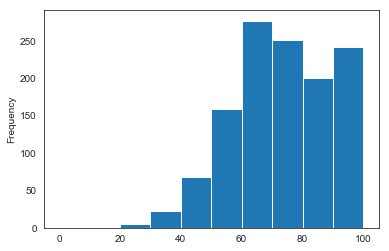

In [47]:
df_merged['Total Grads % of cohort'].plot(kind='hist')

In [39]:
df_merged['Total Grads % of cohort'].describe()

count    1225.000000
mean       73.409143
std        16.270372
min         0.000000
25%        62.000000
50%        72.900000
75%        87.400000
max       100.000000
Name: Total Grads % of cohort, dtype: float64

In [ ]:
##
## Do some visualization
##

In [48]:
def CorrMtx(df, dropDuplicates = True):

    # Your dataset is already a correlation matrix.
    # If you have a dateset where you need to include the calculation
    # of a correlation matrix, just uncomment the line below:
    # df = df.corr()

    # Exclude duplicate correlations by masking uper right values
    if dropDuplicates:    
        mask = np.zeros_like(df, dtype=np.bool)
        mask[np.triu_indices_from(mask)] = True

    # Set background color / chart style
    sns.set_style(style = 'white')

    # Set up  matplotlib figure
    f, ax = plt.subplots(figsize=(11, 9))

    # Add diverging colormap from red to blue
    cmap = sns.diverging_palette(250, 10, as_cmap=True)

    # Draw correlation plot with or without duplicates
    if dropDuplicates:
        sns.heatmap(df, mask=mask, cmap=cmap, 
                square=True,
                linewidth=.5, cbar_kws={"shrink": .5}, ax=ax)
    else:
        sns.heatmap(df, cmap=cmap, 
                square=True,
                linewidth=.5, cbar_kws={"shrink": .5}, ax=ax)

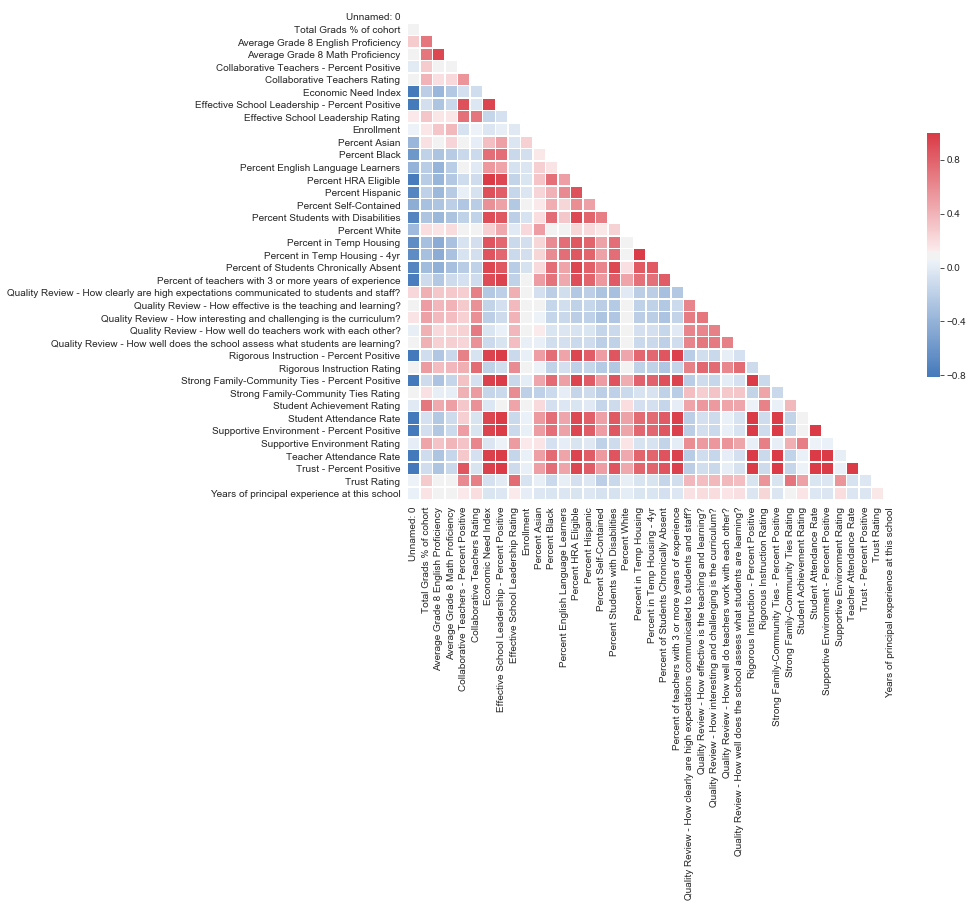

In [49]:
# run a correlation on all of our variables
# print the heat map 
import seaborn as sns
corr = df_merged.corr()
CorrMtx(corr, dropDuplicates = True)

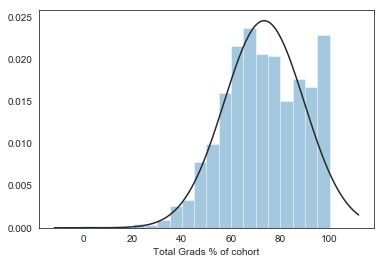

<Figure size 432x288 with 0 Axes>

In [139]:
import scipy.stats as stats
sns.distplot(df_merged['Total Grads % of cohort'], fit=stats.norm, bins=20, kde=False);

plt.savefig('plots/target_dist.png')
plt.show()
fig = plt.figure()


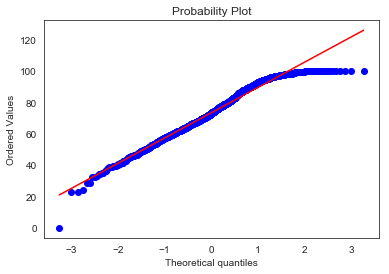

In [51]:
res = stats.probplot(df_merged['Total Grads % of cohort'], plot=plt)
plt.show()
#plt.savefig('plots/target_prob.png')

In [ ]:
df_merged['Total Grads % of cohort'].describe()

In [ ]:
bad_labels = df_merged[df_merged['Total Grads % of cohort'].isna()]['ID'].index

In [ ]:
##
## Save our dataframe again!
##
df_merged.to_csv('data/clean_target_and_features.csv')

In [ ]:
df_1 = df_merged[df_merged['Total Grads % of cohort'] > 73]

In [ ]:
len(df_1)

In [ ]:
len(df_merged)

In [ ]:
df_merged.median()

In [ ]:
len(bad_labels)

In [55]:
features = list(df_merged.columns.values)

In [ ]:
len(features)

In [63]:
#break the colums into groups to plot 4 on a row at a time
n = 4
row_groups= [features[i:i+n] for i in range(0, len(features), n) ]

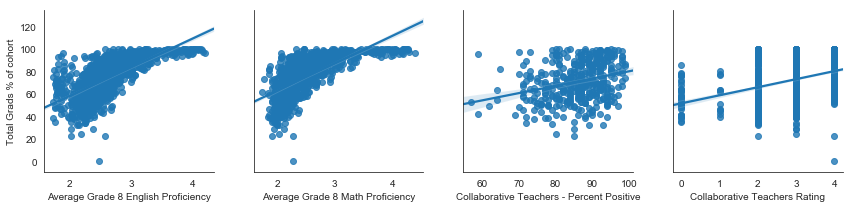

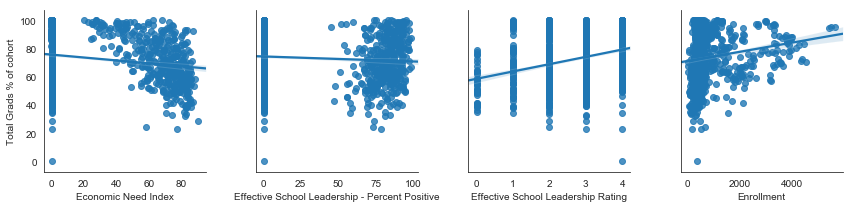

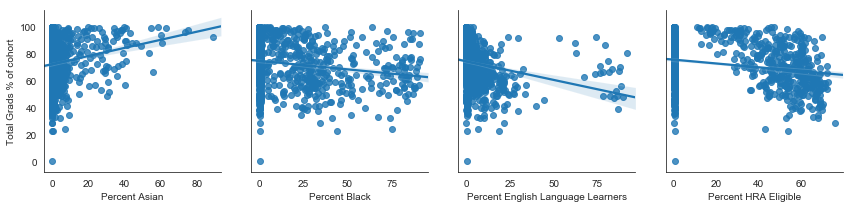

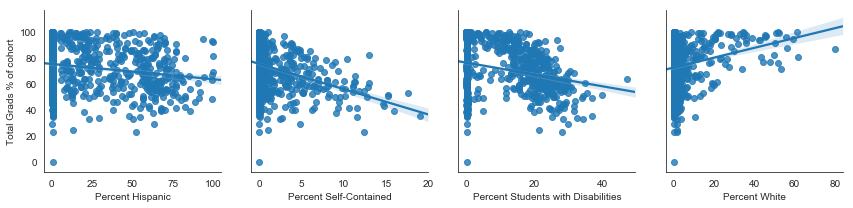

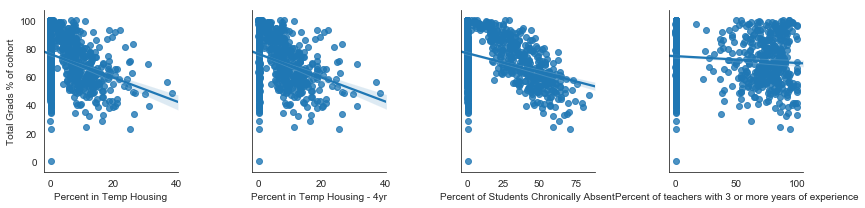

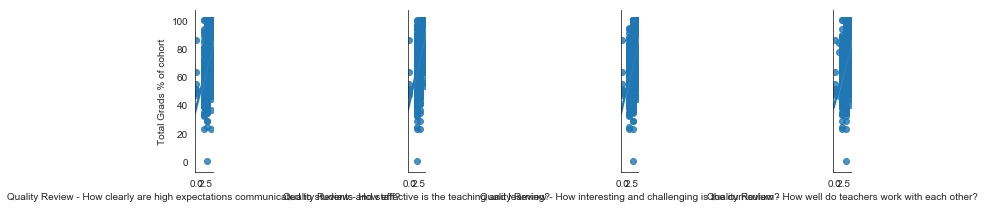

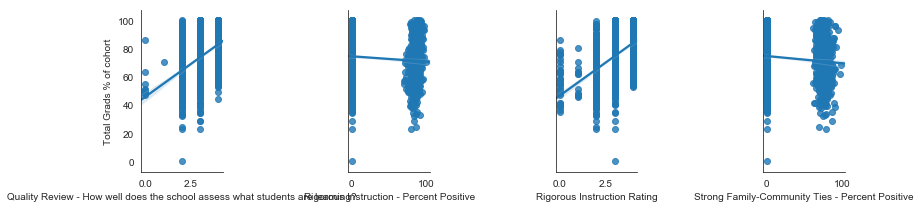

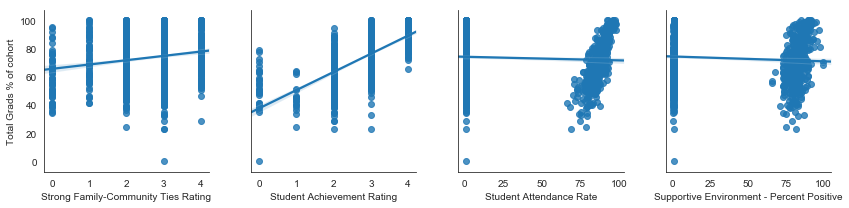

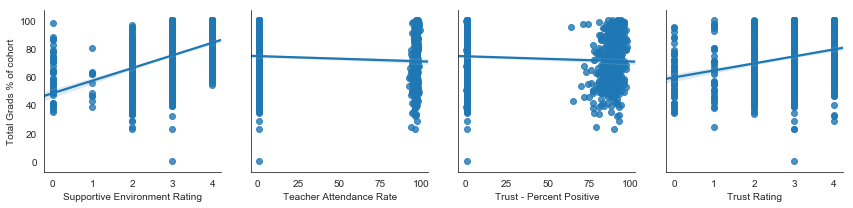

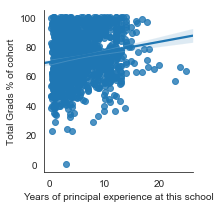

In [64]:
# create scatter plots for every independent variable vs. our target variable
for i in row_groups:
    pp = sns.pairplot(data=df_merged, y_vars=['Total Grads % of cohort'],x_vars=i, kind="reg", height=3)

In [ ]:
plot = sns.pairplot(data=df_merged, y_vars=['savePctg'],
             x_vars='shotsFor', kind="reg", 
             height=4,aspect=1.5)
plot.fig.suptitle('Correlation between save percentage and win percentage')
# plot.axes.set_xlabel('Number of faceoffs lost in a season')
plt.xlabel("Goalie's save percentage")
plt.ylabel('Win percentage')

plot.savefig('Corr4.png')

In [65]:
df_merged['target'] = np.where(df_merged['Total Grads % of cohort'] > 73, 1, 0)

In [66]:
x_class_pass = df_merged[df_merged.target==1]['target']

In [67]:
x_class_fail = df_merged[df_merged.target==0]['target']

In [74]:
len(x_class_fail)

614

In [75]:
len(x_class_pass)

611

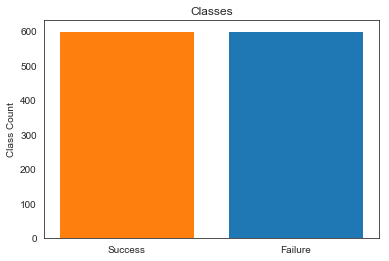

In [138]:
# plt.bar(x_class_pass, len(x_class_pass))
# plt.xticks(x_class_pass, ('Success'))
# plt.bar(x_class_fail, len(x_class_fail))
# plt.xticks(x_class_fail, ('Fail'))
# plt.xlabel('HS Succes|Fail Classes')
# plt.ylabel('Class Count')
# plt.title('HS Succes|Fail Classes')
# plt.show()

###

labels = ['Success', 'Failure']


x = np.arange(len(labels))  # the label locations
width = 0.50  # the width of the bars

fig, ax = plt.subplots()
ax.bar(x_class_pass, height=600, label='Success')
ax.bar(x_class_fail, height=600, label='Failure')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Class Count')
ax.set_title('Classes')
ax.set_xticks(x)
ax.set_xticklabels(labels)


plt.savefig('plots/class_count.png')

plt.show()


In [83]:
df_merged.to_csv('data/class_labels_and_targets.csv')

In [ ]:
scatter_matrix(df_merged[features], figsize=(12, 8))

In [ ]:
df_merged.hist(bins=50, figsize=(20,15))

In [ ]:
len(df_merged.columns)

In [81]:
Y_all = df_merged['target']

In [ ]:
len(Y_all)

In [ ]:
df_merged.columns

In [82]:
X_all = df_merged.drop(['target','Total Grads % of cohort', 'Unnamed: 0'], axis=1).copy()

In [ ]:
len(X_all.columns)

In [ ]:
X_all.columns

In [ ]:
df_merged.set_index(['ID'], inplace=True)

In [ ]:
df_merged.head()

In [84]:
df_all = pd.read_csv('data/class_labels_and_targets.csv')

In [ ]:
df_all.head()

In [85]:
df_all.fillna(value=0, inplace=True)

In [86]:
X_all = df_all.drop(['target','Total Grads % of cohort', 'ID', 'School Name_x', 'Unnamed: 0'], axis=1).copy()

In [87]:
Y_all = df_all['target']

In [88]:
X_train, X_test, y_train, y_test = train_test_split(X_all, Y_all, test_size = 0.2, random_state = 42)

In [ ]:
X_train.head()

In [89]:
X_train.to_csv('data/X_train.csv')

In [90]:
X_test.to_csv('data/X_test.csv')

In [91]:
y_train.to_csv('data/y_train.csv')

In [92]:
y_test.to_csv('data/y_test.csv')

In [140]:
##
## To a "dummy" test to get a baseline!
##
def print_metrics(test, preds):
    print("Precision Score: {}".format(precision_score(test, preds)))
    print("Recall Score: {}".format(recall_score(test, preds)))
    print("Accuracy Score: {}".format(accuracy_score(test, preds)))
    print("F1 Score: {}".format(f1_score(test, preds)))
	
# Fitting and training the dummy
#dummy = DummyClassifier(strategy='most_frequent')
dummy = DummyClassifier(strategy='stratified')
dummy.fit(X_train, y_train)

# Dummy predictions
dum_pred = dummy.predict(X_test)

#Printing out results
print_metrics(y_test, dum_pred)

Precision Score: 0.5607476635514018
Recall Score: 0.45112781954887216
Accuracy Score: 0.5102040816326531
F1 Score: 0.5


In [142]:
print_acc_and_matrix(y_test, dum_pred, label='Stratified Dummy Classifier')

STRATIFIED DUMMY CLASSIFIER


Accuracy is: 51.02040816326531

AUC is: 0.52
--------------------------------------------------
Confusion Matrix
col_0     0    1  All
target               
0        65   47  112
1        73   60  133
All     138  107  245
--------------------------------------------------
              precision    recall  f1-score   support

           0       0.47      0.58      0.52       112
           1       0.56      0.45      0.50       133

    accuracy                           0.51       245
   macro avg       0.52      0.52      0.51       245
weighted avg       0.52      0.51      0.51       245



In [ ]:
joblib.dump(dummy, 'dummy_baseline_model.pkl')

In [ ]:
X_train.head()

In [99]:
## 
## Start with Decison GTree
##
# max_depth': 5, 'min_samples_split': 5}
#clf = DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_split=5)
clf = DecisionTreeClassifier(criterion='entropy')
clf.fit(X_train,y_train) 
# y_pred = clf.predict(X_test)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [117]:
y_pred = clf.predict(X_test)

In [120]:
def print_acc_and_matrix(y_test, y_pred, label):
    # Calculate Accuracy 
    print('='*50)
    print(label.upper())
    print('\n')
    acc = accuracy_score(y_test,y_pred) * 100
    print("Accuracy is: {0}".format(acc))

    # Check the AUC for predictions
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    print("\nAUC is: {0}".format(round(roc_auc,2)))
    
    print('-'*50)

    # Create and print a confusion matrix 
    print('Confusion Matrix')
#    print(pd.crosstab(y_test, y_pred, rownames=['True'], colnames=['Predicted'], margins=True))
    print(pd.crosstab(y_test, y_pred, margins=True))    
    print('-'*50)
    print(classification_report(y_test, y_pred))
    print('='*50)
    

In [121]:
print_acc_and_matrix(y_test, y_pred, label='Decision Tree')

DECISION TREE


Accuracy is: 83.26530612244898

AUC is: 0.83
--------------------------------------------------
Confusion Matrix
col_0     0    1  All
target               
0        90   22  112
1        19  114  133
All     109  136  245
--------------------------------------------------
              precision    recall  f1-score   support

           0       0.83      0.80      0.81       112
           1       0.84      0.86      0.85       133

    accuracy                           0.83       245
   macro avg       0.83      0.83      0.83       245
weighted avg       0.83      0.83      0.83       245



In [103]:
f1_score(y_test, y_pred, average='weighted')

0.8324503836421615

In [104]:
##
## Our Decision Tree was pretty good, so let's save it@!
##
joblib.dump(clf, 'decision_tree.pkl')


['decision_tree.pkl']

In [ ]:
# visualizing the regression tree
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

In [ ]:
png = graph.create_png()

In [ ]:
with open('plots/tree.png', 'wb') as png_file:
    png_file.write(png)

In [ ]:
clf.feature_importances_

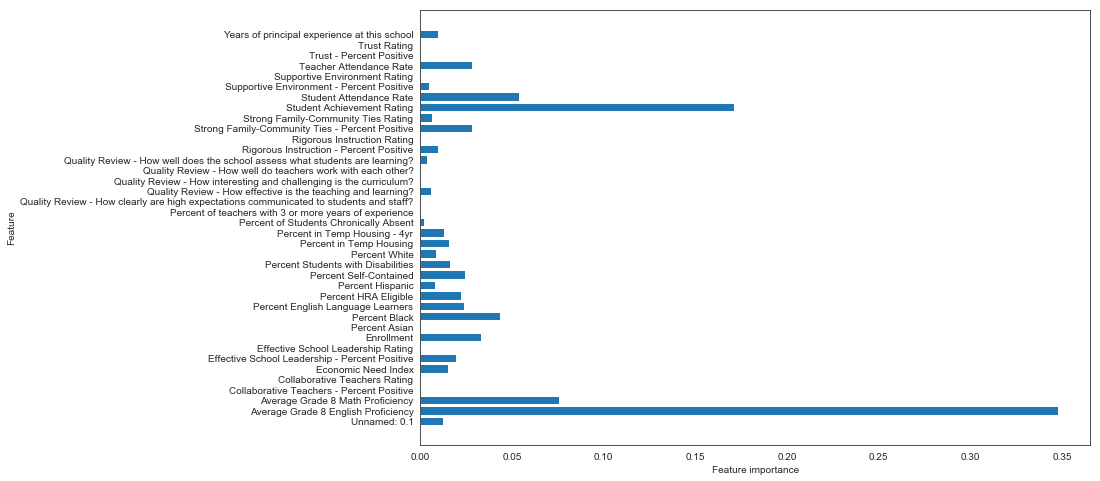

In [146]:
def plot_feature_importances(model, data_train, plot_name):
    n_features = data_train.shape[1]
    plt.figure(figsize=(12,8))
    plt.barh(range(n_features), model.feature_importances_, align='center') 
    plt.yticks(np.arange(n_features), data_train.columns.values) 
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    file_path = 'plots/' + plot_name
    plt.savefig(file_path)

plot_feature_importances(clf, X_train, 'tree_features.png')

In [122]:
##
## Random Forest
##d
forest = RandomForestClassifier(n_estimators=100, max_depth= 5)
forest.fit(X_train, y_train)
print('train score: ', forest.score(X_train, y_train))
print('test score: ', forest.score(X_test, y_test))

train score:  0.9173469387755102
test score:  0.8489795918367347


In [123]:
y_pred = forest.predict(X_test)

In [124]:
print_acc_and_matrix(y_test, y_pred, label='Default Random Forest')

DEFAULT RANDOM FOREST


Accuracy is: 84.89795918367346

AUC is: 0.85
--------------------------------------------------
Confusion Matrix
col_0     0    1  All
target               
0        97   15  112
1        22  111  133
All     119  126  245
--------------------------------------------------
              precision    recall  f1-score   support

           0       0.82      0.87      0.84       112
           1       0.88      0.83      0.86       133

    accuracy                           0.85       245
   macro avg       0.85      0.85      0.85       245
weighted avg       0.85      0.85      0.85       245



In [ ]:
##
## Random Forest was even better, so save it
##
joblib.dump(forest, 'random_forest.pkl')

In [148]:
len(features)

37

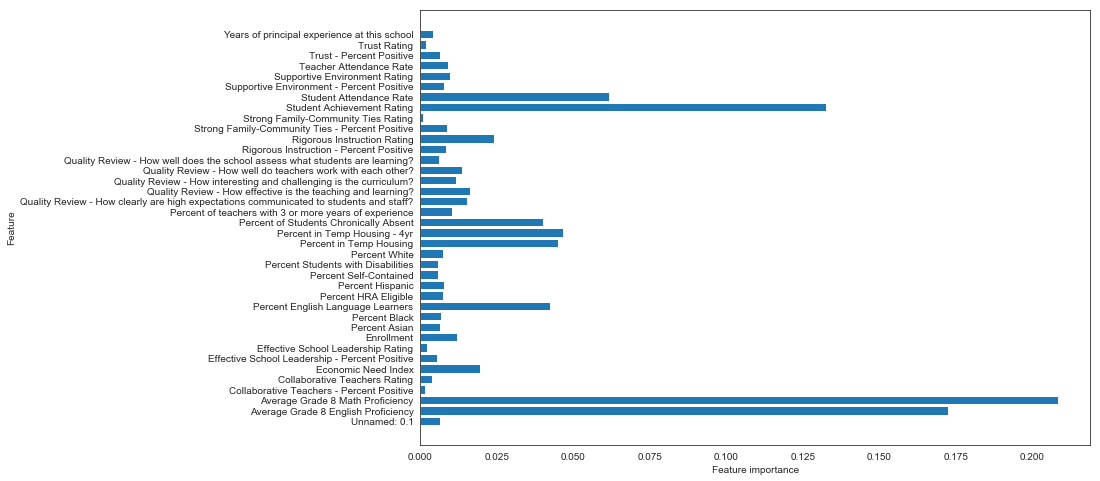

In [147]:
plot_feature_importances(forest, X_train, 'rf_features.png')

In [125]:
# {'criterion': 'gini', 'max_depth': 10, 'min_samples_split': 5}
opt_forest = RandomForestClassifier(criterion='gini', max_depth=10, min_samples_split=5)
opt_forest.fit(X_train, y_train)
print('train scoe: ', opt_forest.score(X_train, y_train))
print('test score: ', opt_forest.score(X_test, y_test))

train scoe:  0.9714285714285714
test score:  0.8244897959183674


In [126]:
y_pred = opt_forest.predict(X_test)

In [128]:
print_acc_and_matrix(y_test, y_pred, label='Optimized Random Forest')

OPTIMIZED RANDOM FOREST


Accuracy is: 82.44897959183673

AUC is: 0.82
--------------------------------------------------
Confusion Matrix
col_0     0    1  All
target               
0        93   19  112
1        24  109  133
All     117  128  245
--------------------------------------------------
              precision    recall  f1-score   support

           0       0.79      0.83      0.81       112
           1       0.85      0.82      0.84       133

    accuracy                           0.82       245
   macro avg       0.82      0.82      0.82       245
weighted avg       0.83      0.82      0.82       245



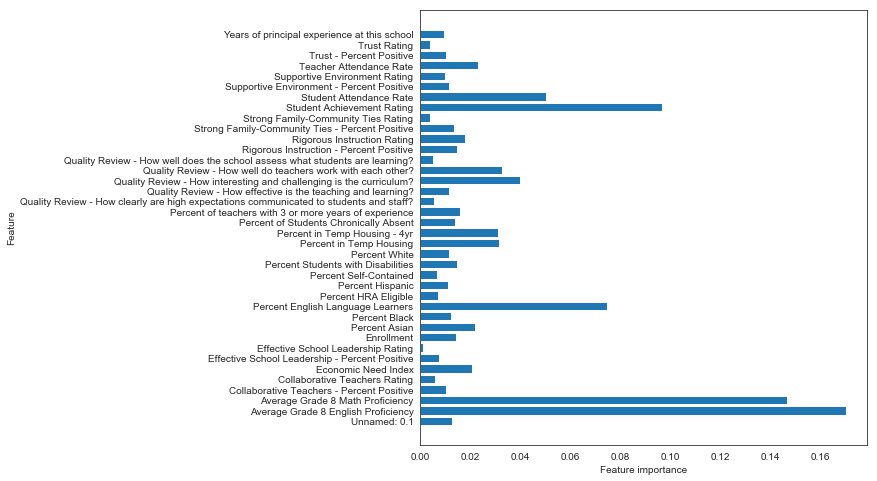

In [108]:
plot_feature_importances(opt_forest, X_train, 'opt_forest.png')

In [ ]:
forest_2 = RandomForestClassifier(n_estimators = 5, max_features= 10, max_depth= 2)
forest_2.fit(X_train, y_train)
rf_tree_1 = forest_2.estimators_[0]
#plot_feature_importances(rf_tree_1, X_train)

In [ ]:
rf_tree_2 = forest_2.estimators_[1]
plot_feature_importances(rf_tree_2, X_train)

In [ ]:
len(forest_2.estimators_)

In [ ]:
for i in range(len(forest_2.estimators_)):
    tree = forest_2.estimators_[i]
    tree_name = f'rf_tree_est_{i}.png'
    plot_feature_importances(tree, X_train, tree_name)

In [129]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

In [130]:
y_predict = knn.predict(X_test)

In [131]:
print_acc_and_matrix(y_test, y_predict, label='KNN')

KNN


Accuracy is: 59.183673469387756

AUC is: 0.59
--------------------------------------------------
Confusion Matrix
col_0     0    1  All
target               
0        64   48  112
1        52   81  133
All     116  129  245
--------------------------------------------------
              precision    recall  f1-score   support

           0       0.55      0.57      0.56       112
           1       0.63      0.61      0.62       133

    accuracy                           0.59       245
   macro avg       0.59      0.59      0.59       245
weighted avg       0.59      0.59      0.59       245



In [ ]:
f1_score(y_test, y_predict, average='weighted')

In [ ]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_predict, labels=None, sample_weight=None))
print(classification_report(y_test, y_pred))

In [ ]:
param_grid = {
    "criterion": ["gini", "entropy"],
    "max_depth": [1, 2, 5, 10],
    "min_samples_split": [2, 5, 10, 20]
}

gs_tree = GridSearchCV(clf, param_grid, cv=3)
gs_tree.fit(X_train, y_train)

gs_tree.best_params_

In [ ]:
gs_forest = GridSearchCV(forest, param_grid, cv=3)
gs_forest.fit(X_train, y_train)

gs_forest.best_params_

In [132]:
##
## XGBoost
##
XG_model = xgb.XGBClassifier()
XG_model.fit(X_train, y_train)
training_preds = XG_model.predict(X_train)
val_preds = XG_model.predict(X_test)
training_accuracy = accuracy_score(y_train, training_preds)
val_accuracy = accuracy_score(y_test, val_preds)

print("Training Accuracy: {:.4}%".format(training_accuracy * 100))
print("Validation accuracy: {:.4}%".format(val_accuracy * 100))


Training Accuracy: 95.2%
Validation accuracy: 86.12%


In [133]:
print_acc_and_matrix(y_test, val_preds, label='XGBoost')

XGBOOST


Accuracy is: 86.12244897959184

AUC is: 0.86
--------------------------------------------------
Confusion Matrix
col_0     0    1  All
target               
0        98   14  112
1        20  113  133
All     118  127  245
--------------------------------------------------
              precision    recall  f1-score   support

           0       0.83      0.88      0.85       112
           1       0.89      0.85      0.87       133

    accuracy                           0.86       245
   macro avg       0.86      0.86      0.86       245
weighted avg       0.86      0.86      0.86       245



In [ ]:
##
## Tune XGBoost
##
param_grid = {
    "learning_rate": [0.1],
    'max_depth': [6],
    'min_child_weight': [10],
    'subsample': [ 0.7],
    'n_estimators': [5, 30, 100, 250],
}

grid_clf = GridSearchCV(XG_model, param_grid, scoring='accuracy', cv=None, n_jobs=1)
grid_clf.fit(X_train, y_train)

best_parameters = grid_clf.best_params_

print("Grid Search found the following optimal parameters: ")
for param_name in sorted(best_parameters.keys()):
    print("%s: %r" % (param_name, best_parameters[param_name]))

training_preds = grid_clf.predict(X_train)
val_preds = grid_clf.predict(X_test)
training_accuracy = accuracy_score(y_train, training_preds)
val_accuracy = accuracy_score(y_test, val_preds)

print("")
print("Training Accuracy: {:.4}%".format(training_accuracy * 100))
print("Validation accuracy: {:.4}%".format(val_accuracy * 100))


In [ ]:
# change kernel to "rbf"

In [134]:
##
## SVM Time
##
tic = time()
svclassifier = SVC(kernel='rbf')  
svclassifier.fit(X_train, y_train) 
y_pred = svclassifier.predict(X_test)
toc = time()
print("run time is {} seconds".format(toc-tic))

run time is 0.09510302543640137 seconds


In [ ]:
print(confusion_matrix(y_test,y_pred))  
print(classification_report(y_test,y_pred)) 
print("The accuracy score is" + " "+ str(accuracy_score(y_test, y_pred)))

In [135]:
print_acc_and_matrix(y_test, y_pred, label='SVM-rbf-kernel')

SVM-RBF-KERNEL


Accuracy is: 46.93877551020408

AUC is: 0.5
--------------------------------------------------
Confusion Matrix
col_0     0   1  All
target              
0       101  11  112
1       119  14  133
All     220  25  245
--------------------------------------------------
              precision    recall  f1-score   support

           0       0.46      0.90      0.61       112
           1       0.56      0.11      0.18       133

    accuracy                           0.47       245
   macro avg       0.51      0.50      0.39       245
weighted avg       0.51      0.47      0.37       245

